# QB Passing

## Load Data

The data has been pre-processed by `NeuralPassing/features.py`

In [132]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter

# Show all columns in DataFrames
pd.options.display.max_columns = None

features = pd.read_csv(os.path.join('NeuralPassing', 'Data', 'qbPassingFeatures.csv'), index_col=0, header=[0,1])

## Explore Data

### General

In [6]:
features.dtypes.value_counts()

float64    138
object       7
dtype: int64

In [7]:
features.loc[:,features.dtypes == object]

Unnamed: 1_level_0          QB                                      \
                   name home_game_1 home_game_2 home_game_3 home_game_4   
0            Derek Carr     NO_PLAY        True       False       False   
1            Derek Carr       False     NO_PLAY        True       False   
2            Derek Carr        True       False     NO_PLAY        True   
3            Derek Carr       False        True       False     NO_PLAY   
4            Derek Carr        True       False        True       False   
...                 ...         ...         ...         ...         ...   
1584     Baker Mayfield        True        True     NO_PLAY        True   
1585     Baker Mayfield       False        True        True     NO_PLAY   
1586     Baker Mayfield       False       False        True        True   
1587     Baker Mayfield        True       False       False        True   
1588     Baker Mayfield       False        True       False       False   

                              
     home_game_5 home_game_6  
0           True        True  
1          False        True  
2          False       False  
3           True       False  
4        NO_PLAY        True  
...          ...         ...  
1584       False       False  
1585        True       False  
1586     NO_PLAY        True  
1587        True     NO_PLAY  
1588        True        True  

[1589 rows x 7 columns]

In [8]:
features.describe()

Unnamed: 2_level_0 Unnamed: 3_level_0           QB               \
                    week             season   pass_cmp_1   pass_att_1   
count        1589.000000        1589.000000  1589.000000  1589.000000   
mean           11.612964          17.546885    21.110394    32.797849   
std             2.885621           1.705628     6.877527    10.019974   
min             7.000000          15.000000     0.000000     0.000000   
25%             9.000000          16.000000    18.000000    29.000000   
50%            12.000000          18.000000    21.110394    32.797849   
75%            14.000000          19.000000    25.000000    38.000000   
max            16.000000          20.000000    44.000000    66.000000   

                                                                         \
        pass_yds_1    pass_td_1   pass_int_1 pass_sacked_1   rush_att_1   
count  1589.000000  1589.000000  1589.000000   1589.000000  1589.000000   
mean    239.701792     1.593548     0.675986      2.078853     3.291039   
std      81.690753     1.136342     0.811421      1.558136     2.720599   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%     202.000000     1.000000     0.000000      1.000000     1.000000   
50%     239.701792     1.593548     0.675986      2.000000     3.000000   
75%     286.000000     2.000000     1.000000      3.000000     4.000000   
max     513.000000     7.000000     5.000000     11.000000    26.000000   

                                                                        \
        rush_yds_1    rush_td_1   pass_cmp_2   pass_att_2   pass_yds_2   
count  1589.000000  1589.000000  1589.000000  1589.000000  1589.000000   
mean     14.830824     0.167742    21.100890    32.816766   241.524481   
std      18.963874     0.382841     6.871173    10.042596    82.121953   
min     -12.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000    18.000000    29.000000   203.000000   
50%      11.000000     0.000000    21.100890    32.816766   241.524481   
75%      19.000000     0.167742    25.000000    38.000000   288.000000   
max     152.000000     2.000000    44.000000    66.000000   506.000000   

                                                                         \
         pass_td_2   pass_int_2 pass_sacked_2   rush_att_2   rush_yds_2   
count  1589.000000  1589.000000   1589.000000  1589.000000  1589.000000   
mean      1.594955     0.713650      2.085312     3.300445    14.787834   
std       1.114606     0.819115      1.543082     2.646146    18.611285   
min       0.000000     0.000000      0.000000     0.000000   -12.000000   
25%       1.000000     0.000000      1.000000     1.000000     1.000000   
50%       1.594955     0.713650      2.000000     3.000000    12.000000   
75%       2.000000     1.000000      3.000000     4.000000    18.000000   
max       7.000000     5.000000     10.000000    26.000000   135.000000   

                                                                        \
         rush_td_2   pass_cmp_3   pass_att_3   pass_yds_3    pass_td_3   
count  1589.000000  1589.000000  1589.000000  1589.000000  1589.000000   
mean      0.161721    21.108251    32.795609   241.218017     1.587434   
std       0.367736     6.895748    10.114172    82.842774     1.107039   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    18.000000    29.000000   203.000000     1.000000   
50%       0.000000    21.108251    32.795609   241.218017     1.587434   
75%       0.161721    25.000000    38.000000   288.000000     2.000000   
max       2.000000    45.000000    68.000000   517.000000     6.000000   

                                                                         \
        pass_int_3 pass_sacked_3   rush_att_3   rush_yds_3    rush_td_3   
count  1589.000000   1589.000000  1589.000000  1589.000000  1589.000000   
mean      0.682059      2.118092     3.277820    14.796366     0.1

### Feature Histograms

#### Label

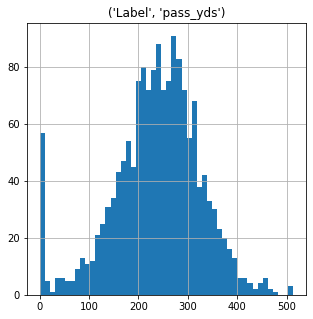

In [19]:
%matplotlib inline
features[[('Label', 'pass_yds')]].hist(bins=50, figsize=(5,5))
plt.show()

#### QB Pass Completion

**N.B.** Peak around 22.5 due to BYE weeks populated with mean values

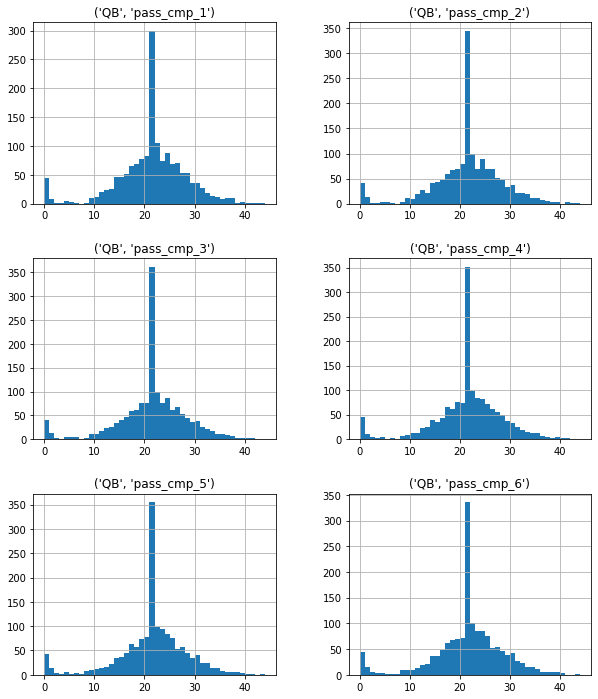

In [35]:
features[[('QB', 'pass_cmp_' + str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('QB', 'pass_cmp_' + str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### QB Pass Attempts

In [75]:
np.arange(-0.5,10,1)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

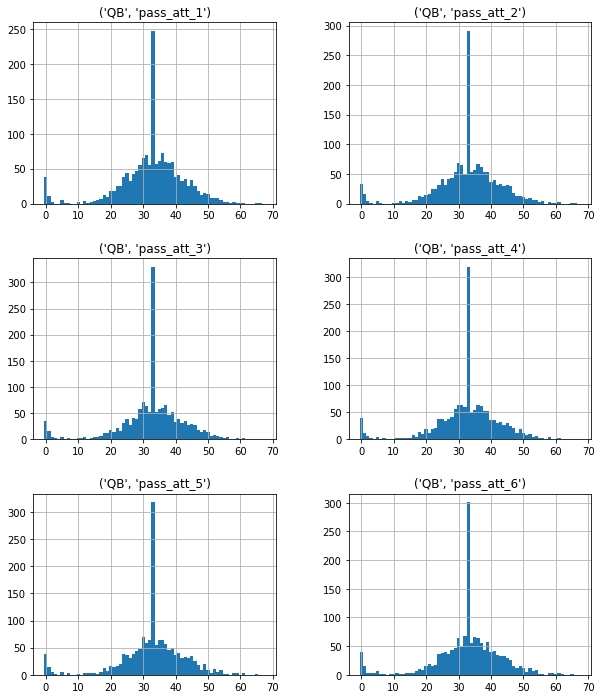

In [76]:
features[[('QB', 'pass_att_' + str(i)) for i in range(1,7)]].hist(bins=np.arange(-0.5,int(features[[('QB', 'pass_att_' + str(i)) for i in range(1,7)]].max().max()),1), figsize=(10,12))
plt.show()

#### QB Pass Yards

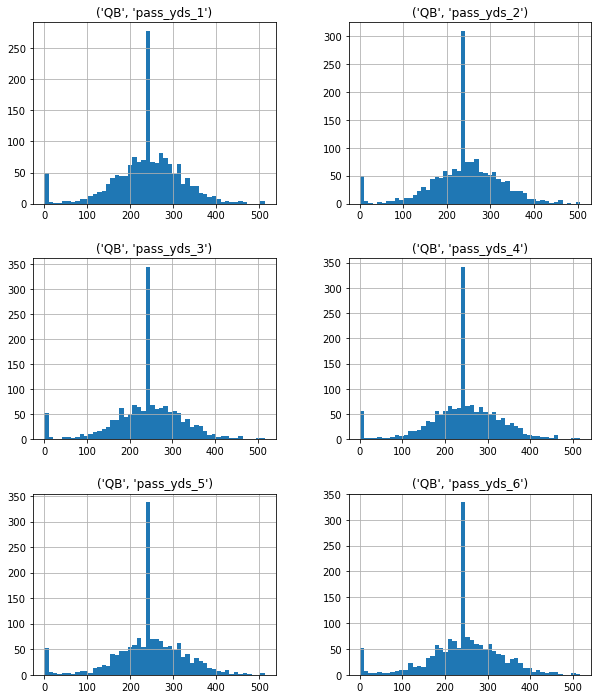

In [47]:
features[[('QB', 'pass_yds_' + str(i)) for i in range(1,7)]].hist(bins=50, figsize=(10,12))
plt.show()

#### QB Pass TDs

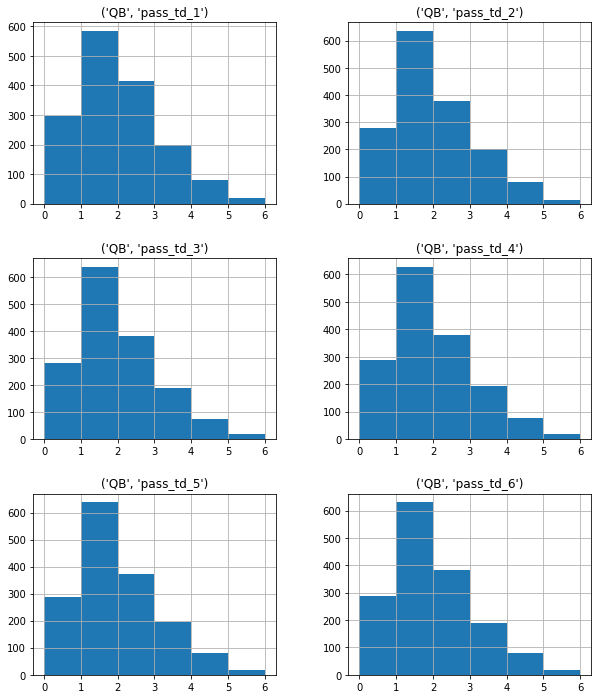

In [45]:
features[[('QB', 'pass_td_' + str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('QB', 'pass_td_' + str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### QB Pass INTs

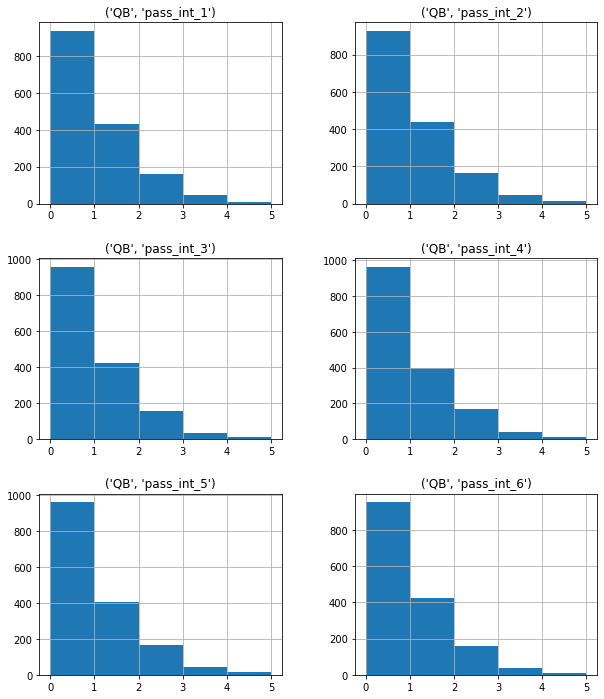

In [49]:
features[[('QB', 'pass_int_' + str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('QB', 'pass_int_' + str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### QB Pass Sacks

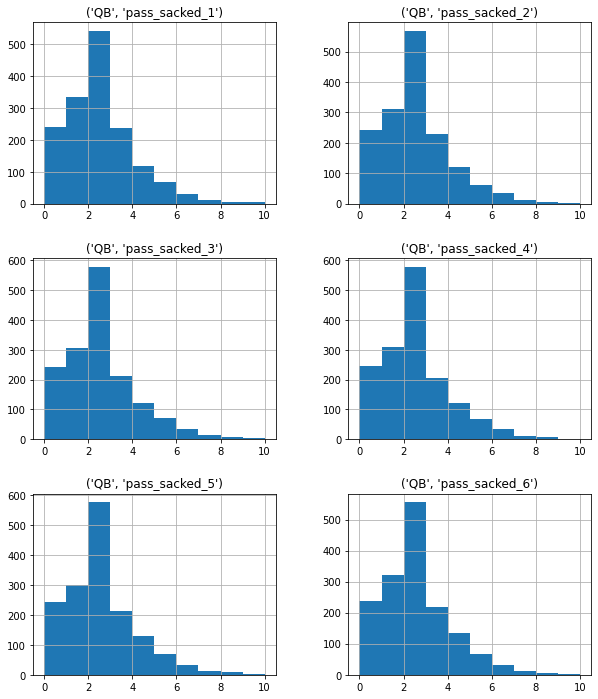

In [51]:
features[[('QB', 'pass_sacked_' + str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('QB', 'pass_sacked_' + str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### QB Rush Attempts

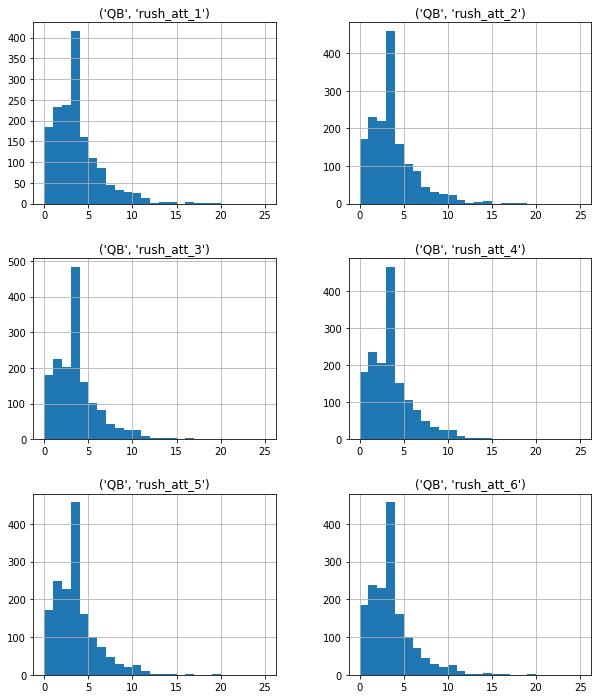

In [54]:
features[[('QB', 'rush_att_' + str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('QB', 'rush_att_' + str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### QB Rush Yards

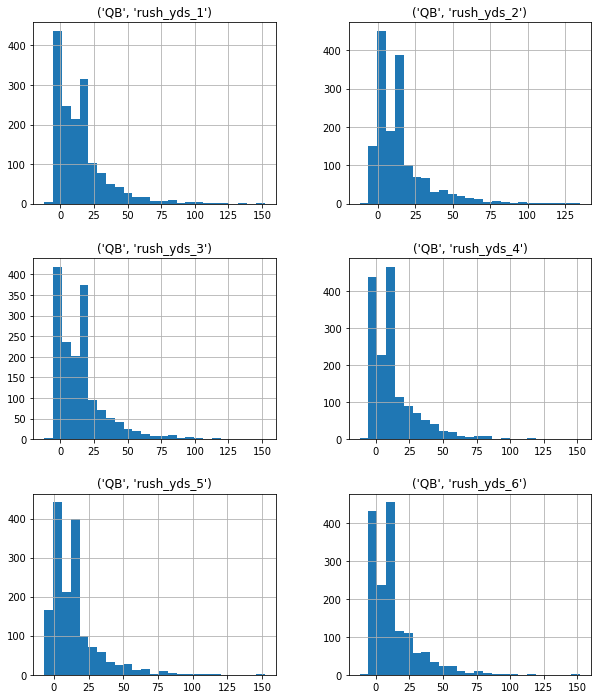

In [56]:
features[[('QB', 'rush_yds_' + str(i)) for i in range(1,7)]].hist(bins=25, figsize=(10,12))
plt.show()

#### QB Rush TDs

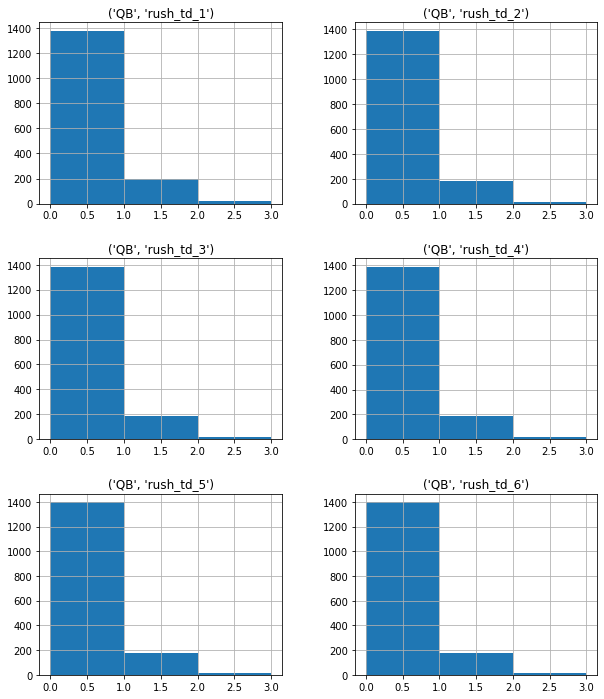

In [89]:
features[[('QB', 'rush_td_' + str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('QB', 'rush_td_' + str(i)) for i in range(1,7)]].max().max())+2), figsize=(10,12))
plt.show()

#### Offence Rush Attempts

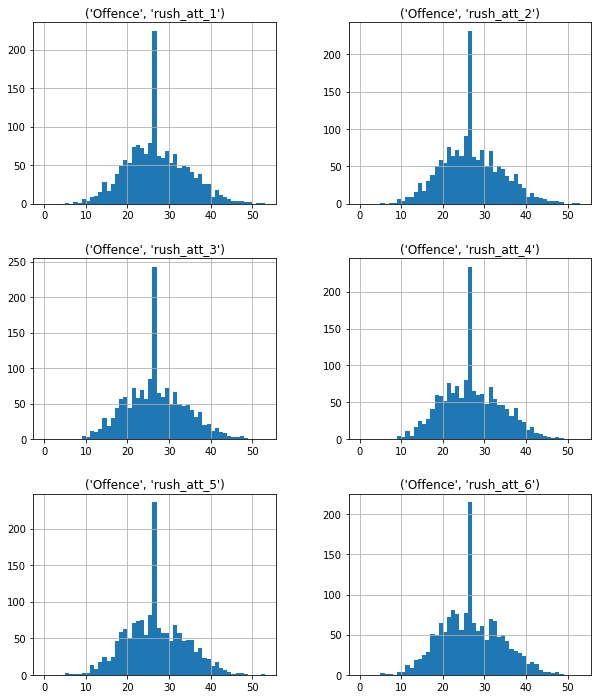

In [78]:
features[[('Offence', 'rush_att_' + str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('Offence', 'rush_att_' + str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### Offence Rush Yards

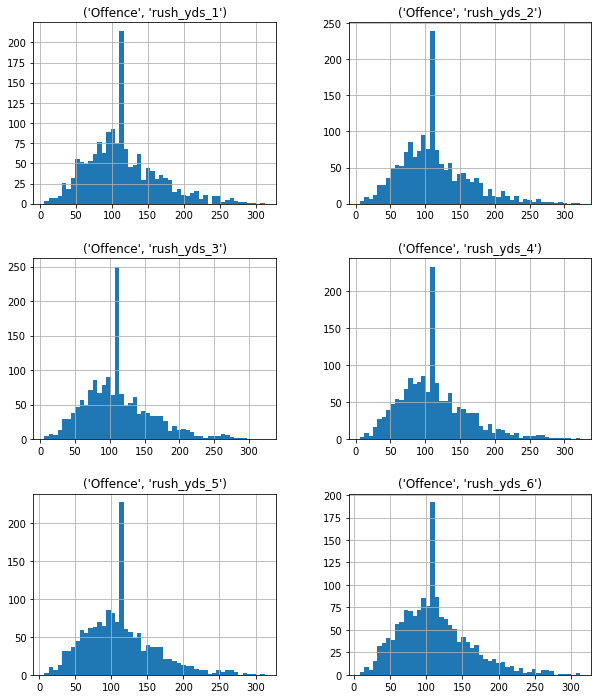

In [81]:
features[[('Offence', 'rush_yds_' + str(i)) for i in range(1,7)]].hist(bins=50, figsize=(10,12))
plt.show()

#### Offence Rush TDs

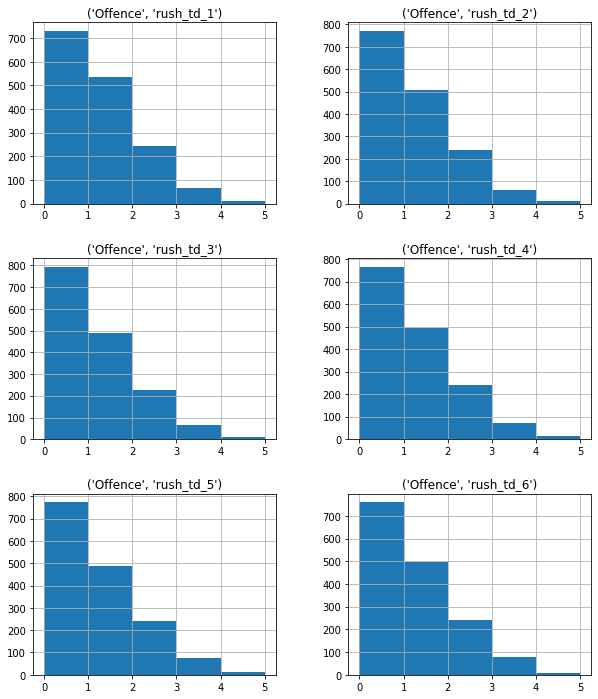

In [87]:
features[[('Offence', 'rush_td_' + str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('Offence', 'rush_td_' + str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### Defence (previous) - Pass Completions

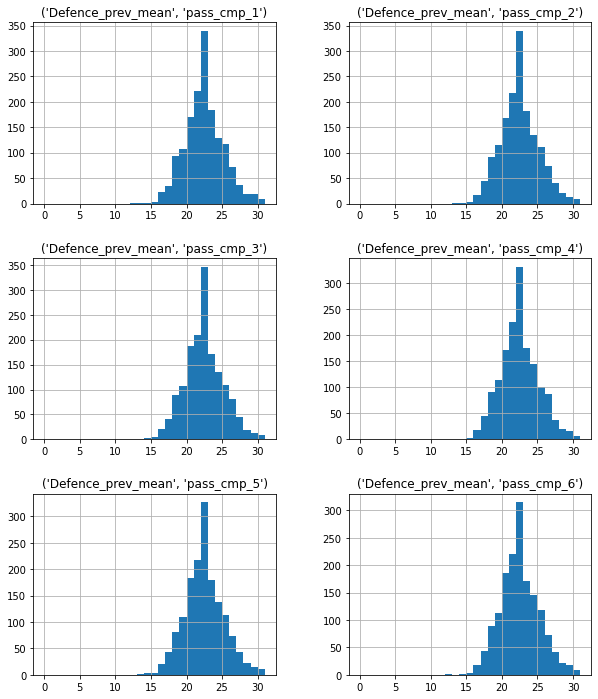

In [109]:
features[[('Defence_prev_mean', 'pass_cmp_' + str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('Defence_prev_mean', 'pass_cmp_' + str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### Defence (previous) - Pass Attempts

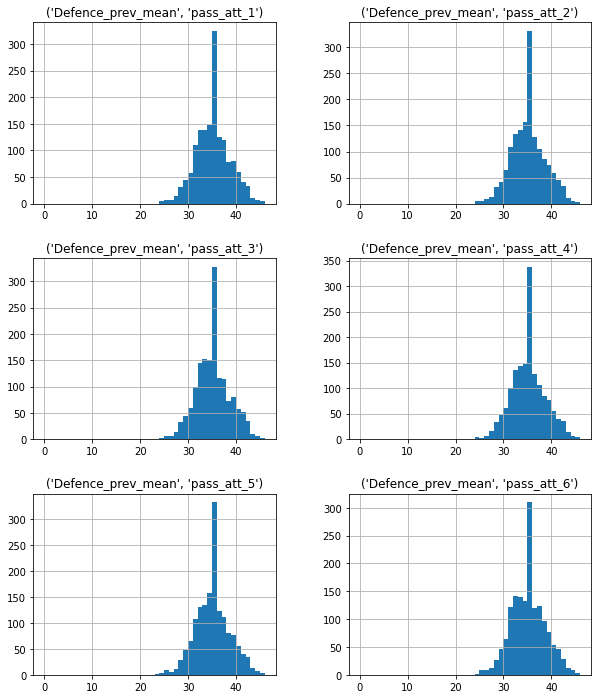

In [110]:
features[[('Defence_prev_mean', 'pass_att_' + str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('Defence_prev_mean', 'pass_att_' + str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### Defence (previous) - Pass Yards

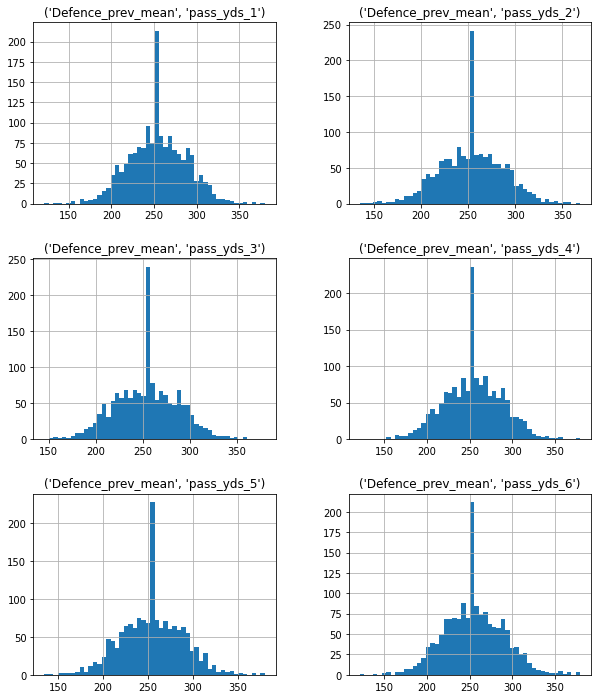

In [111]:
features[[('Defence_prev_mean', 'pass_yds_' + str(i)) for i in range(1,7)]].hist(bins=50, figsize=(10,12))
plt.show()

#### Defence (previous) - Pass TDs

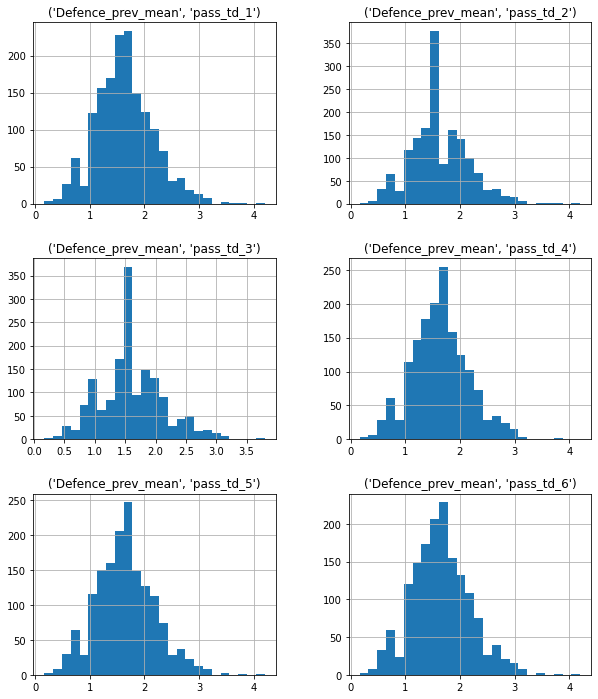

In [121]:
features[[('Defence_prev_mean', 'pass_td_' + str(i)) for i in range(1,7)]].hist(bins=25, figsize=(10,12))
plt.show()

#### Defence (previous) - Pass INTs

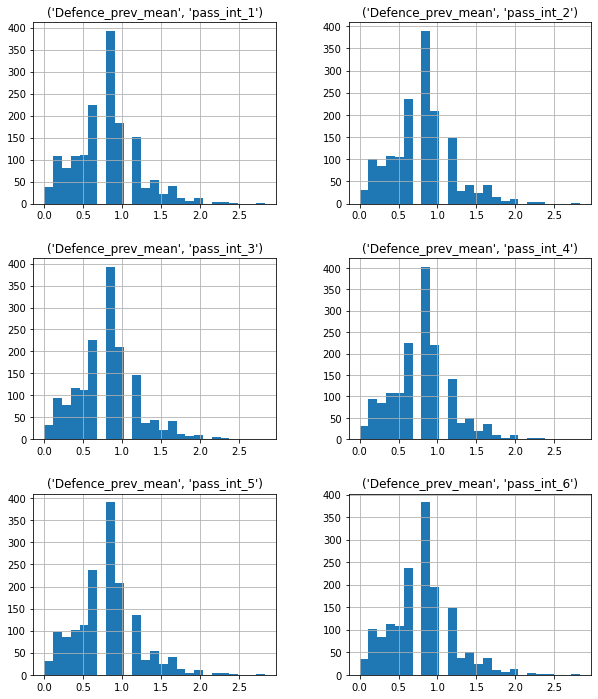

In [122]:
features[[('Defence_prev_mean', 'pass_int_' + str(i)) for i in range(1,7)]].hist(bins=25, figsize=(10,12))
plt.show()

#### Defence (previous) - Sacks

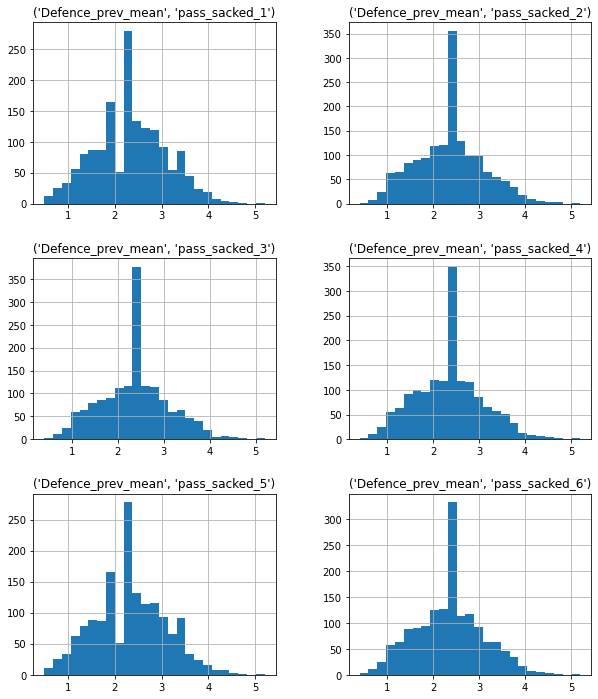

In [123]:
features[[('Defence_prev_mean', 'pass_sacked_' + str(i)) for i in range(1,7)]].hist(bins=25, figsize=(10,12))
plt.show()

#### Defence (previous) - Rush Attempts

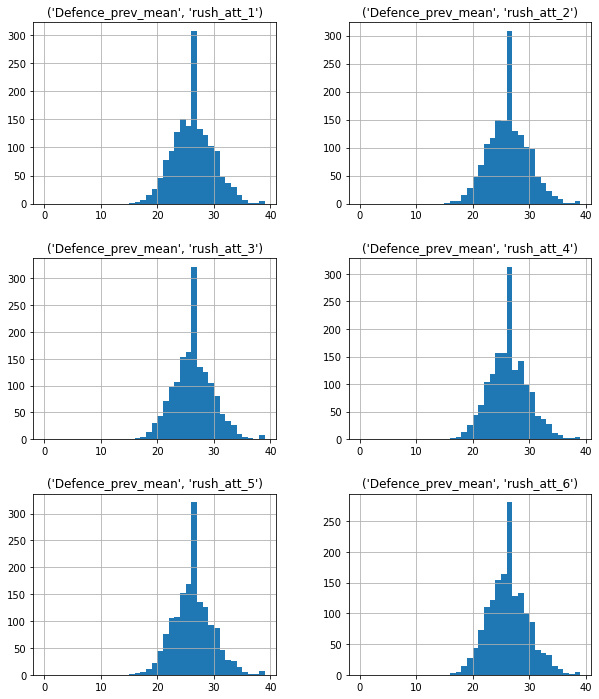

In [107]:
features[[('Defence_prev_mean', 'rush_att_' + str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('Defence_prev_mean', 'rush_att_' + str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### Defence (previous) - Rush Yards

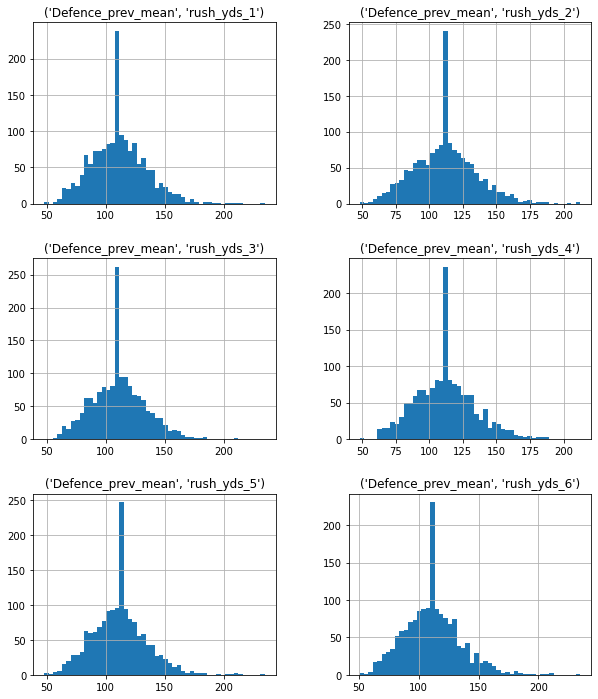

In [125]:
features[[('Defence_prev_mean', 'rush_yds_' + str(i)) for i in range(1,7)]].hist(bins=50, figsize=(10,12))
plt.show()

#### Defence (previous) - Rush TDs

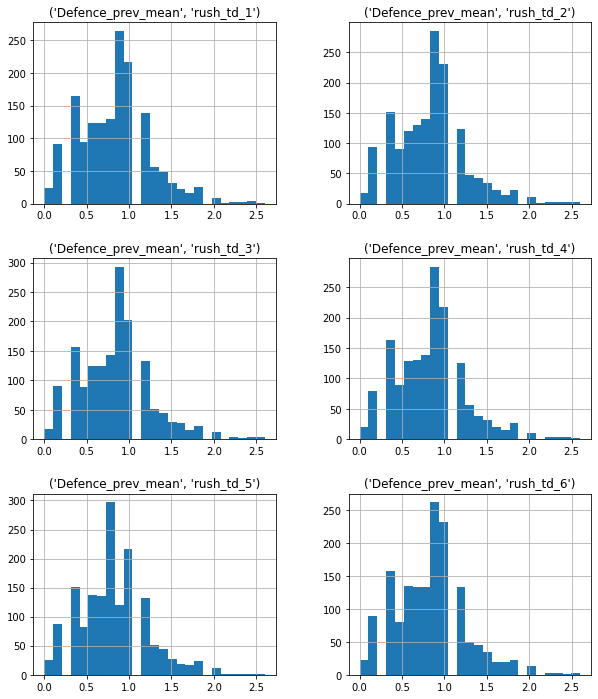

In [128]:
features[[('Defence_prev_mean', 'rush_td_' + str(i)) for i in range(1,7)]].hist(bins=25, figsize=(10,12))
plt.show()

#### Defence (upcoming)

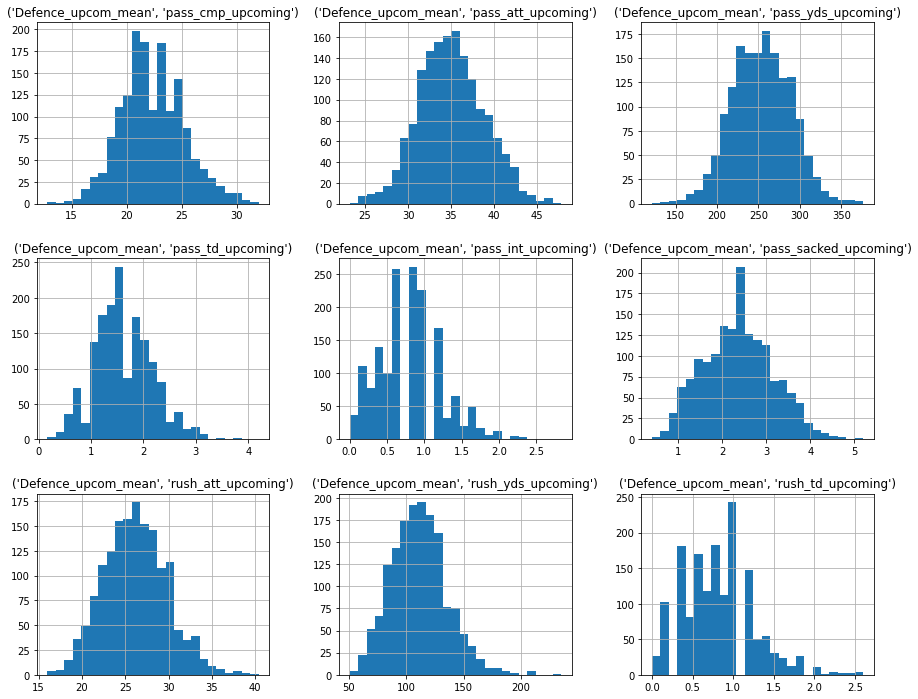

In [133]:
features[['Defence_upcom_mean']].hist(bins=25, figsize=(15,12))
plt.show()

### Look for patterns

In [147]:
correlation_matrix = features.corr()
correlation_matrix[('Label', 'pass_yds')].sort_values(ascending=False)

Label  pass_yds      1.000000
QB     pass_cmp_1    0.381915
       pass_yds_1    0.379420
       pass_att_1    0.377805
       pass_yds_2    0.352055
                       ...   
       rush_yds_2   -0.070476
       rush_att_4   -0.078780
       rush_yds_3   -0.080870
       rush_td_4    -0.090874
       rush_yds_4   -0.097482
Name: (Label, pass_yds), Length: 138, dtype: float64

In [152]:
features_ordered = list(correlation_matrix[('Label', 'pass_yds')].sort_values(ascending=False).index)

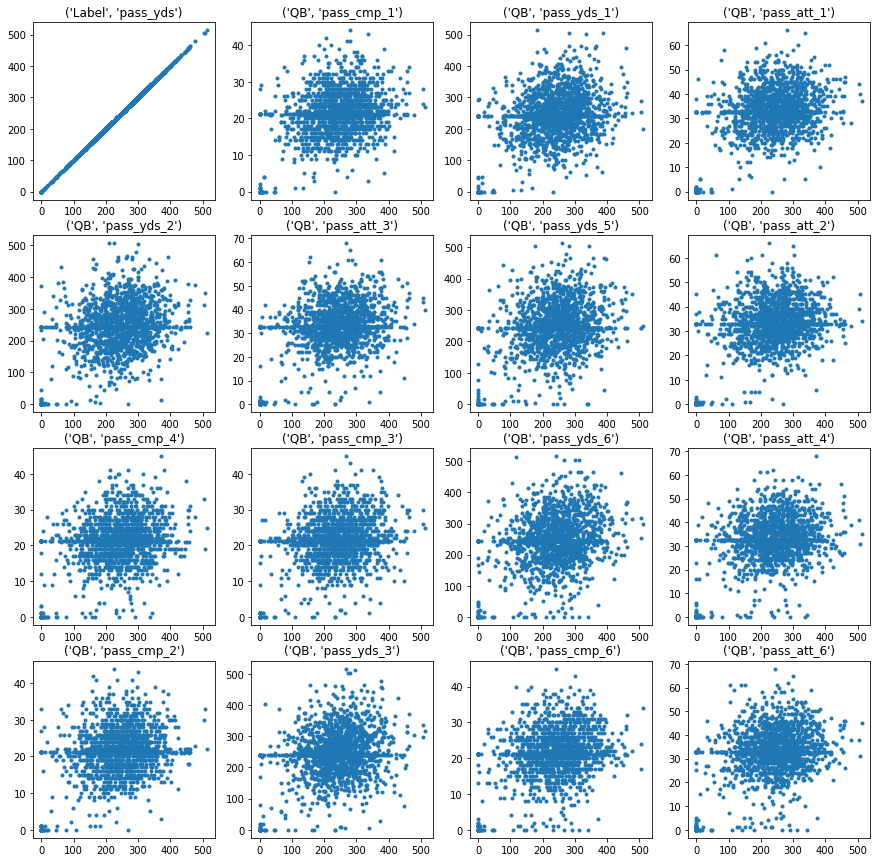

In [161]:
f, axs = plt.subplots(2,2,figsize=(15,15))

for i, f in enumerate(features_ordered[:16]):
    plt.subplot(4,4,i+1)
    plt.plot(features[('Label', 'pass_yds')], features[f], linestyle='None', marker='.')
    plt.title(f)
    
plt.show()

# TODO DATA

* remove Taysom Hill types (e.g. by fewer than 10 pass attempts)